# General Technical Analysis Calculator
<b>Having trouble analyzing your stock/investment portfolios?</b> <br>
<b>Sick of having to pay for overpriced calculators?</b> <br>
<b>Tired of searching the web for tips and tricks to navigate the market?</b><br>
<b>Fear not!</b> <br><br>
The following program was developed to allow amatuer investors/traders like me to gain insights into one's current <br>
positions. The program allows you to visualize your stock's performance in any particular time frame, furthermore <br>
it also allows investors/traders to visualize their stock's current trajectory, determining buying or selling <br>
opportunities. <br>
Upon entering a time frame and ticker symbol, the investor/trader will be presented with current stock data in-line <br>
with the designated time frame. It will also show trading volumes during a particular time frame. <br>
<br>There are currently  6 Algorithmic Trading techniques and methods one can utilize.
* Simple Moving Average Visualizer: Visualizes short and long-term moving averages, also gives options to view buy <br>
  and sell signals, resistance/support levels as well as revealing the closing price. Better Used for <b>long-term <br>
  Trend Analysis</b> 
* Relative Strength Index: A <b>Momentum-based Indicator</b> for a particular stock. Also shows entry and exit points.
* Bollinger Bands: A <b>Volatility-based Indicator</b>, helping determine price fluctuations in the market.
* MACD: Utilizes Exponential Moving Averages, best for <b>short-term trend analysis</b>, better follows new and raw data from <br>
  the market.
* Fibonacci Retracements: Determines entry and exit points, helping determing <b>Support/Resistance Levels</b>.
* Average Volatility Indicator: Another <b>Volatility-based indicator</b>, used to visualize fluctuations in stock prices.

### P.S Still functional! Just need to clean the code up a bit more

In [4]:
#Import necessary libraries and modules 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime as dt
import datetime
from datetime import datetime, timedelta
from matplotlib import gridspec
from termcolor import colored
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si

In [5]:
# Read data
# Rename and reformat pricing to 2 decimal places 
def read_data(tick_symbol, start_date, end_date):
    data = get_data(tick_symbol, start_date=start_date, end_date=end_date, index_as_date = False)
    data = data.rename(columns={'date':'Date', 'high':'High', 'low':'Low', 'close':'Close', 'adjclose':'Adj Close', 'volume':'Volume'})
    lis = ['High', 'Low', 'Close', 'Adj Close']
    for i in lis:
        data[i] = data[i].round(2)
    return data

In [6]:
# visualize support/resistance levels for SMA
def show_level(graph, data, resistance):
    if resistance == 'b':
        support = graph.axhline(data['SMA'].tail(1).values, ls = '--', color = 'red')  
        resistance = graph.axhline(data['SMA'].max(), ls = '--', color = 'green')
        return (support, resistance)
    elif resistance == 's':
        return graph.axhline(data['SMA'].tail(1).values, ls = '--', color = 'red')  
    elif resistance == 'r':
        return graph.axhline(data['SMA'].max(), ls = '--', color = 'green')
    else:
        None

In [7]:
# Show current closing price of stock 
def show_price(data, input_user):
    if input_user == 'y':
        plot = plt.scatter(data['Date'].tail(1).values, data['Adjusted Close Price'].tail(1).values, marker = '*', color = 'black', alpha = 1)
        label = str(data['Adjusted Close Price'].tail(1).values)
        for x, y, z in zip(data['Date'].tail(1).values, data['Adjusted Close Price'].tail(1).values, data['Adjusted Close Price'].tail(1).values):
            label = z
            plt.annotate(label, #text to be displayed
                         (x,y), #point for the specific label
                         textcoords="offset points", #positioning of the text
                         xytext=(0,10), #distance from text to points
                         ha='center',
                         fontsize = 12) #horizontal alignment
        return plot
    else:
        None

In [8]:
# Show percentage increase/decrease of stock 
# Used in main menu before technical analysis options
def show_percentage(data):  
    today_price = float(data['Adj Close'].tail(1).values)
    yesterday_price = float(data['Adj Close'].tail(2).values[-2])
    #Also highlights percentages as "red" or "green" for better intuition
    if today_price > yesterday_price:
        ans = ((today_price - yesterday_price)/(yesterday_price))*100
        pos = colored(str(round(ans, 2)), 'green')
        pos_percent = colored('%', 'green')
        return print("Increased by " + pos + pos_percent + " from previous close.")
    elif today_price < yesterday_price:
        ans = ((yesterday_price - today_price)/(yesterday_price))*-100
        neg = colored(str(round(ans, 2)), 'red')
        neg_percent = colored('%', 'red')
        return print("Decreased by " + neg + neg_percent + " from previous close.")
    else: 
        return print("No changes from previous close.")
    

In [9]:
# Calculate relative strength of stock in time period (days)
def calculate_relative_strength(data, time_period):
    data = data.set_index(data['Date'])
    delta = data['Adj Close'].diff(1)
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    AVG_gain = up.rolling(window = time_period).mean()
    AVG_loss = abs(down.rolling(window = time_period).mean())
    return (AVG_gain, AVG_loss)

In [10]:
# Calculates RSI
def calculate_RSI(AVG_gain, AVG_loss):
    RS = AVG_gain/AVG_loss
    RSI = 100.0-(100.0/(1.0+RS))
    return RSI

In [11]:
# Plot RSI 
def plot_RSI(RSI, tick_symbol):
    plt.figure(figsize=(12.5,12.5))
    plot = sns.lineplot(x = RSI.index, y = RSI.values)
    plot.set_title("RSI: " + tick_symbol)
    plot.set_ylabel('Relative Strength Index')
    plot.axhline(30, color = 'green')
    plot.axhline(70, color = 'green')
    plot.axhline(20, color = 'yellow')
    plot.axhline(80, color = 'yellow')
    plot.axhline(10, color = 'red')
    plot.axhline(90, color = 'red')
    
    data = RSI.tail(1)
    if data.values > 80:
        for x,y in zip(data.index,data.values):
            label = "Sell"
            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center',
                         fontsize = 25) # horizontal alignment can be left, right or center
            plt.scatter(data.index, data.values,label = 'Sell', marker = 'v', color = 'red', alpha = 1, s = 100)
    elif data.values < 20:
        for x,y in zip(data.index,data.values):
            label = "Buy"
            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center',
                         fontsize = 25) # horizontal alignment can be left, right or center
            plt.scatter(data.index, data.values, label = 'Buy', marker = '^', color = 'green', alpha = 1, s = 100)      
    plt.show()

In [12]:
#Visualizes RSI
def RSI(data, tick_symbol, time_period):
        gain, loss = calculate_relative_strength(data, time_period)
        RSI = calculate_RSI(gain, loss)
        plot_RSI(RSI, tick_symbol)
        plt.show()

In [13]:
#SMA generator 
def generator(data, status, tick_symbol, short_avg, long_avg, resistance, input_user):    
    dataAdj = pd.DataFrame()
    dataAdj['Date'] = data['Date']
    dataAdj['Adjusted Close Price'] = data['Adj Close']
    data['SMA'] = data['Adj Close'].rolling(short_avg).mean()
    dataAdj['SMA'] = data['SMA']
    
    dataAdj['LMA'] = data['Adj Close'].rolling(long_avg).mean()
    
    buySigPrice = []
    sellSigPrice = []
    flag = -1
    
    for i in range(len(dataAdj['Adjusted Close Price'])):
        if dataAdj['SMA'][i] > dataAdj['LMA'][i]:
            if flag != 1:
                buySigPrice.append(dataAdj['Adjusted Close Price'][i])
                sellSigPrice.append(np.nan)
                flag = 1
            else:
                buySigPrice.append(np.nan)
                sellSigPrice.append(np.nan)
        elif dataAdj['SMA'][i] < dataAdj['LMA'][i]:
            if flag != 0:
                buySigPrice.append(np.nan)
                sellSigPrice.append(dataAdj['Adjusted Close Price'][i])
                flag = 0
            else:
                buySigPrice.append(np.nan)
                sellSigPrice.append(np.nan)
        else:
             buySigPrice.append(np.nan)
             sellSigPrice.append(np.nan)
    
    dataAdj['buy'] = buySigPrice
    dataAdj['sell'] = sellSigPrice
    
    data_no_nan_buy = dataAdj.loc[dataAdj['buy'].notnull()]
    data_no_nan_sell = dataAdj.loc[dataAdj['sell'].notnull()]
    data_no_nan = pd.concat([data_no_nan_buy, data_no_nan_sell])
    data_no_nan = data_no_nan.reset_index(drop = True)
    
    plt.figure(figsize = (12.5, 12.5))
    graph = sns.lineplot(x = dataAdj['Date'], y = dataAdj['Adjusted Close Price'])
    graph2 = sns.lineplot(x = dataAdj['Date'], y = dataAdj['SMA'], alpha = 0.5)
    graph3 = sns.lineplot(x = dataAdj['Date'], y = dataAdj['LMA'], alpha = 0.5)
    
    plt.scatter(dataAdj['Date'], dataAdj['buy'], label = 'Buy', marker = '^', color = 'green', alpha = 1)
    plt.scatter(dataAdj['Date'], dataAdj['sell'],label = 'Sell', marker = 'v', color = 'red', alpha = 1)
    plt.legend(['Adjusted Close Price', 'Short-Moving Average', 'Long-Moving Average'])
    
    graph.set_title(str(short_avg) + " and " + str(long_avg) + " Moving Averages: " + tick_symbol)
    
    data_no_nan = dataAdj.loc[dataAdj[status].notnull()]
    
    show_level(graph3, dataAdj, resistance)
    
    if input_user == 'y':
        show_price(dataAdj, input_user)
    else:
        None
    
    for x,y,z in zip(data_no_nan['Date'],data_no_nan['Adjusted Close Price'], data_no_nan['Adjusted Close Price']):
        label = z #Label corresponds to labels in dataset
        plt.annotate(label, #text to be displayed
                     (x,y), #point for the specific label
                     textcoords="offset points", #positioning of the text
                     xytext=(0,10), #distance from text to points
                     ha='center',
                     fontsize = 12) #horizontal alignment
    plt.show()

In [14]:
# Produces MACD trends in stock prices 
def MACD(data, tick_symbol, span_short, span_mid, span_long):
        plt.figure(figsize=(12.5,12.5))
        data['short_EMA'] = data['Adj Close'].ewm(span = span_short, adjust = False).mean()
        data['mid_EMA'] = data['Adj Close'].ewm(span = span_mid, adjust = False).mean()
        data['long_EMA'] = data['Adj Close'].ewm(span = span_long, adjust = False).mean()
        
        graph = sns.lineplot(data = data, x = 'Date', y = 'Adj Close')
        sns.lineplot(data = data, x = 'Date', y = 'short_EMA')
        sns.lineplot(data = data, x = 'Date', y = 'mid_EMA')
        sns.lineplot(data = data, x = 'Date', y = 'long_EMA')
        
        graph.set_title(str(span_short) + ", " + str(span_mid) + " and " + str(span_long) + " Exponential Moving Averages: " + tick_symbol)
        plt.show()

In [15]:
# Produces the bollinger bands for a stock 
def Bollinger_Band(data, period, ticker):
        plt.figure(figsize=(12.5,12.5))
        data['bollinger_first'] = data['Adj Close'].rolling(period).mean() 
        data['bollinger_second'] = data['Adj Close'].rolling(period).mean() + 2*(data['Adj Close'].rolling(period).std())
        data['bollinger_third'] = data['Adj Close'].rolling(period).mean() - 2*(data['Adj Close'].rolling(period).std())
        graph = sns.lineplot(data = data, x = 'Date', y = 'Adj Close')
        sns.lineplot(data = data, x = 'Date', y = 'bollinger_second')
        sns.lineplot(data = data, x = 'Date', y = 'bollinger_first')
        sns.lineplot(data = data, x = 'Date', y = 'bollinger_third')
        plt.legend(['Adjusted Close Price', 'Upper Band', 'Middle Band', 'Lower Bound'])
        graph.set_title("Bollinger Bands:" + tick_symbol)
        plt.show()

In [16]:
# Provides support/resistance levels based on fibonacci retracements 
def fibonacci_retracement(data, ticker):
    plt.figure(figsize=(12.5,12.5))
    maximum = data['Adj Close'].max()
    minimum = data['Adj Close'].min()
    difference = maximum - minimum
    
    first_lvl = maximum - difference*0.236
    second_lvl = maximum - difference*0.382
    third_lvl = maximum - difference*0.5
    fourth_lvl = maximum - difference*0.618
    fifth_lvl = maximum - difference*0.764
    
    graph = sns.lineplot(data = data, x = 'Date', y = 'Adj Close', color = 'black')
    graph.axhline(maximum, linestyle = '--', color = 'red')
    graph.axhline(first_lvl, linestyle = '--', color = 'orange')
    graph.axhline(second_lvl, linestyle = '--', color = 'yellow')
    graph.axhline(third_lvl, linestyle = '--', color = 'green')
    graph.axhline(fourth_lvl, linestyle = '--', color = 'blue')
    graph.axhline(fifth_lvl, linestyle = '--', color = 'purple')
    graph.axhline(minimum, linestyle = '--', color = 'violet')
    plt.text(x = 0, y = maximum, s = 'Here we go')
    graph.set_title('Fibonacci Retracement: ' + ticker)
    plt.show()

In [17]:
#For average volatilaty indicator in particlar time period (days)
import matplotlib.pyplot as plt
def ATR(data, ticker, period):
    fig = plt.figure()
    f = plt.figure(figsize=(50,12.5))
    ff = plt.figure(figsize=(50,5))
    ax = f.add_subplot(121)
    ax2 = ff.add_subplot(122)
    data['CH-CL'] = abs(data['High'] - data['Low'])
    data['CH-PC'] = abs(data['High'] - data['Adj Close'].shift(periods = 1))
    data['CL-PC'] = abs(data['Low'] - data['Adj Close'].shift(periods=1))
    data['max_tr'] = data[['CH-CL', 'CH-PC', 'CL-PC']].max(axis=1)
    sns.lineplot(ax = ax, data = data, x = 'Date', y = 'Adj Close', label = 'Adjusted Close Price')
    sns.lineplot(ax = ax2, data = data, x = 'Date', y = data['max_tr'].rolling(window=period).mean(), label = 'Volatility Indicator', color = 'green')
    plt.show()

In [18]:
def show_fundamentals(name):
    fundamentals = si.get_income_statement(name)
    fundamentals = pd.DataFrame(fundamentals)
    return fundamentals

In [19]:
# Show initial information at the beginning calculator 
def show_initial_info(data, ticker):
    fig = plt.figure()
    f = plt.figure(figsize=(50,12.5))
    ff = plt.figure(figsize=(50,5))
    ax = f.add_subplot(121)
    ax2 = ff.add_subplot(122)
    plot = sns.lineplot(ax = ax, data = data, x = 'Date', y = 'Adj Close', label = 'Adjusted Close Price')
    vol = sns.lineplot(ax = ax2, data = data, x = 'Date', y = 'Volume', label = 'Volume')
    price = plot.scatter(data['Date'].tail(1).values, data['Adj Close'].tail(1).values, marker = 'x', color = 'black', alpha = 1)
    label = str(data['Adj Close'].tail(1).values)
    volume = str(data['Volume'].tail(1).values)
    for x, y, z in zip(data['Date'].tail(1).values, data['Adj Close'].tail(1).values, data['Adj Close'].tail(1).values):
        label = z
        plot.annotate(label, #text to be displayed
                     (x,y), #point for the specific label
                     textcoords="offset points", #positioning of the text
                     xytext=(0,10), #distance from text to points
                     ha='center',
                     fontsize = 12) #horizontal alignment
    for x, y, z in zip(data['Date'].tail(1).values, data['Volume'].tail(1).values, data['Volume'].tail(1).values):
        volume = z
        vol.annotate(volume, #text to be displayed
                     (x,y), #point for the specific label
                     textcoords="offset points", #positioning of the text
                     xytext=(0,10), #distance from text to points
                     ha='center',
                     fontsize = 12) #horizontal alignment
    vol_symbol = vol.scatter(data['Date'].tail(1).values, data['Volume'].tail(1).values, marker = 'x', color = 'black', alpha = 1)
    print('\n')
    show_percentage(data)
    current_date = datetime.today().strftime ('%d-%B-%Y')
    plot.set_title(ticker + ': ' + str(current_date))
    previous = round(float(data['Adj Close'].tail(2).values[-2]), 2)
    current = round(float(data['Adj Close'].tail(1).values), 2)
    high = round(float(data['High'].tail(1).values), 2)
    low = round(float(data['Low'].tail(1).values), 2)
    print("Previous Close Price: " + str(previous))
    print("Current Close Price: " +  str(current))
    print("High: " +  str(high))
    print("Low: " +  str(low))
    plt.show()

Welcome! Type 1 to continue, 0 to exit 1
Ticker Symbol:  plug
Start Date (YYYY-MM-DD):  2020




Decreased by -1.9% from previous close.
Previous Close Price: 27.33
Current Close Price: 26.81
High: 27.79
Low: 26.4


<Figure size 432x288 with 0 Axes>

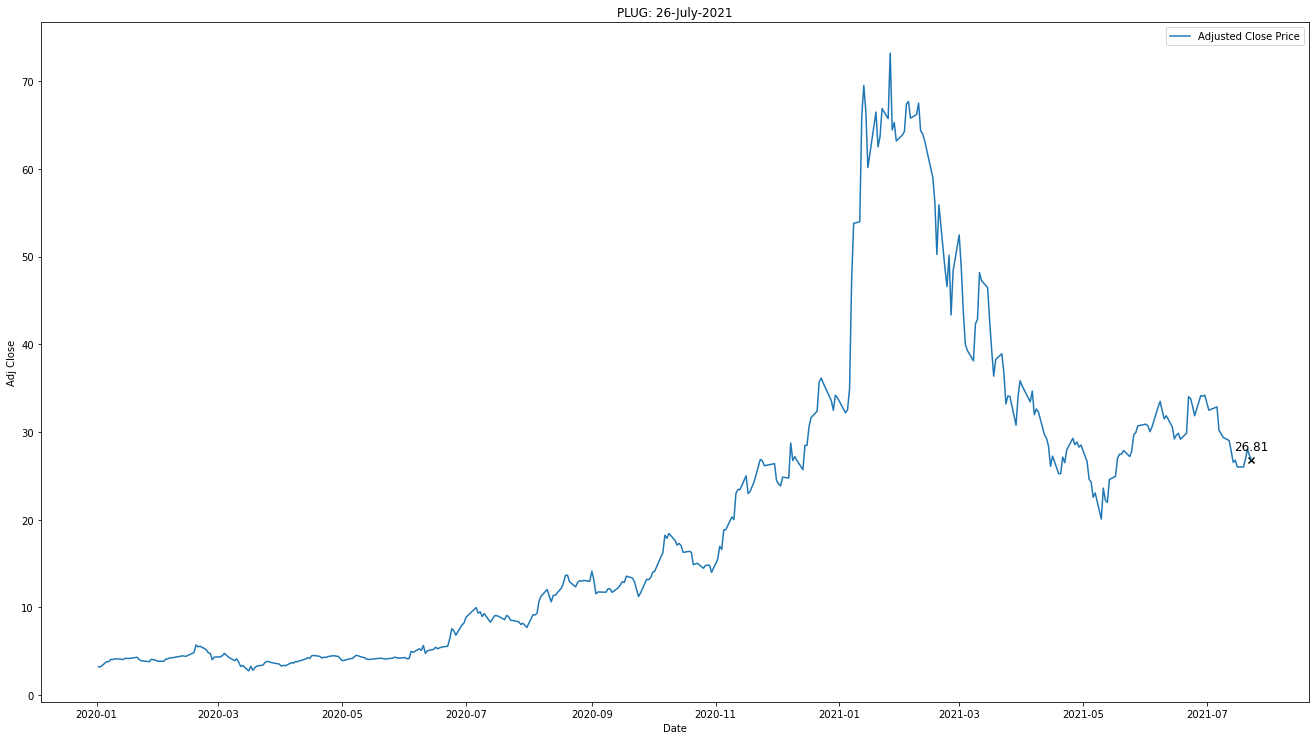

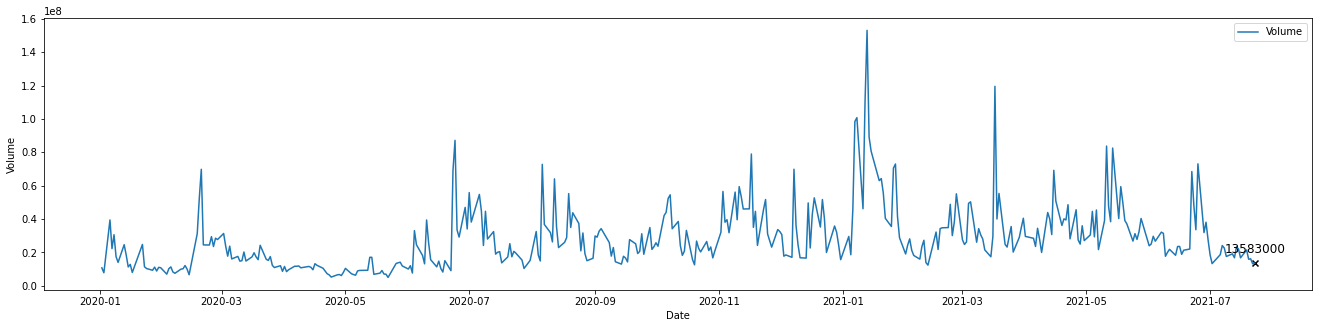


Menu:
Press 1: Simple Moving Average Visualizer
Press 2: Relative Strength Index
Press 3: Bollinger Bands
Press 4: MACD
Press 5: Fibonacci Retracement
Press 6: Average True Range: Volatility Indicator


 1
Type 'buy' for Buy Indicator, 'sell' for sell indicators or any other characters for none buy
What is your short moving average period? 20
What is your long moving average period? 80
To view previous closing price, type 'y', else 'n' y
Press 'r' for resistance levels, 's' for support levels, 'b' for both, else 'n' for nothing b


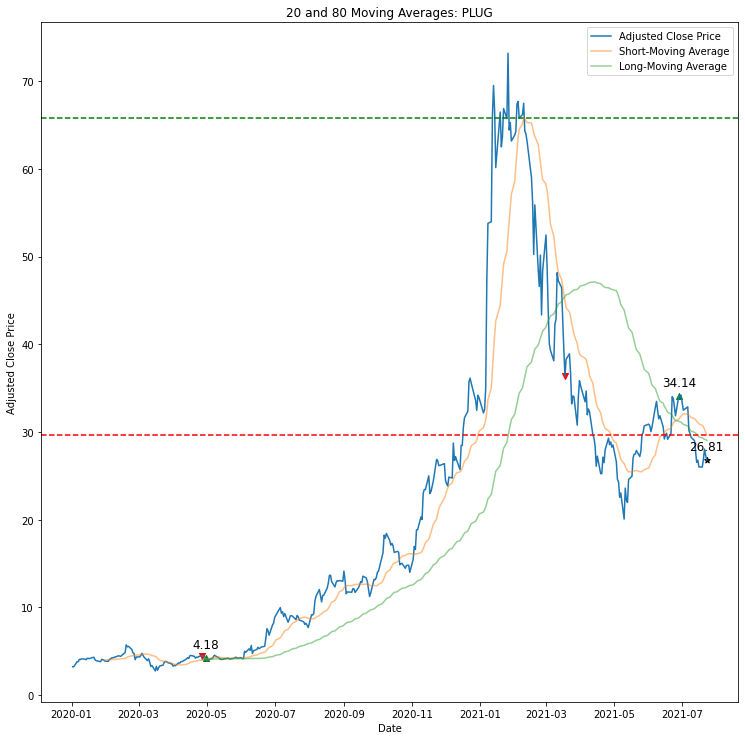

Would you like to continue? Type 1 for 'Yes', 0 for 'no' 1
Ticker Symbol:  nvda
Start Date (YYYY-MM-DD):  2020




Decreased by -0.18% from previous close.
Previous Close Price: 195.94
Current Close Price: 195.58
High: 197.0
Low: 192.5


<Figure size 432x288 with 0 Axes>

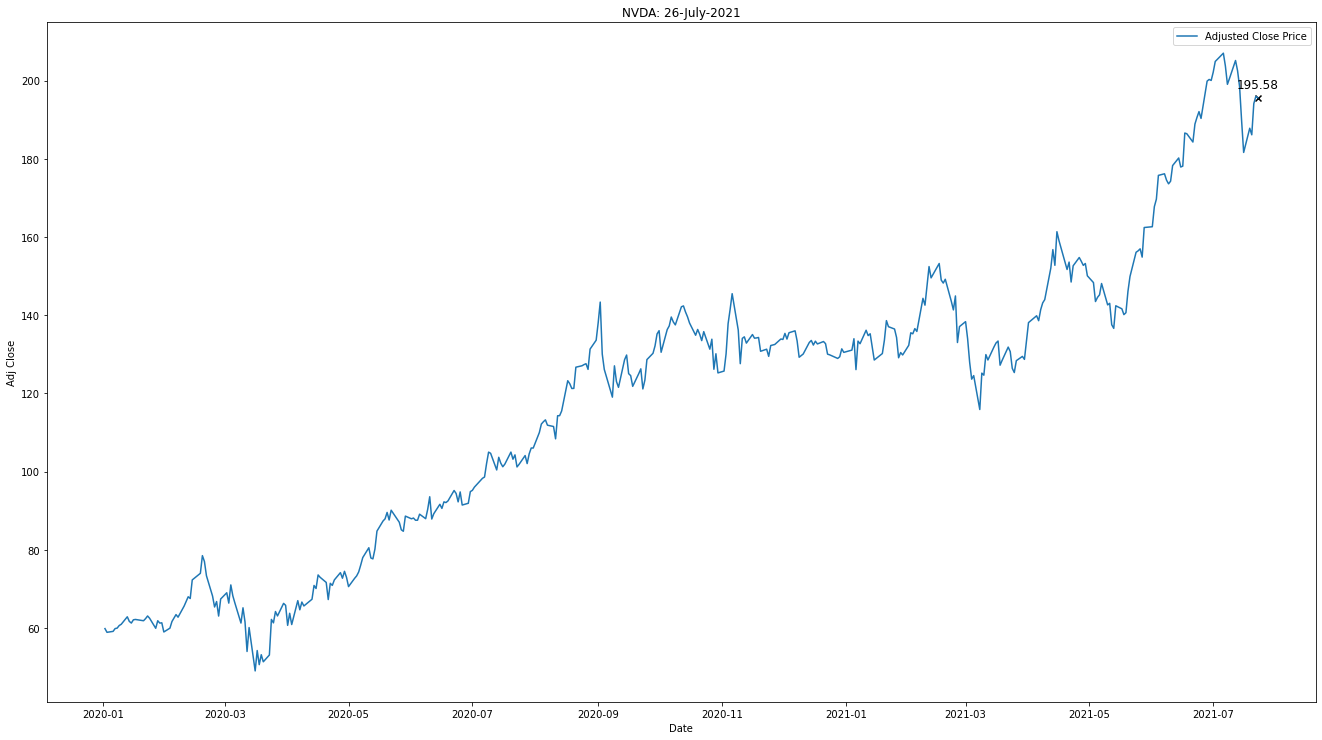

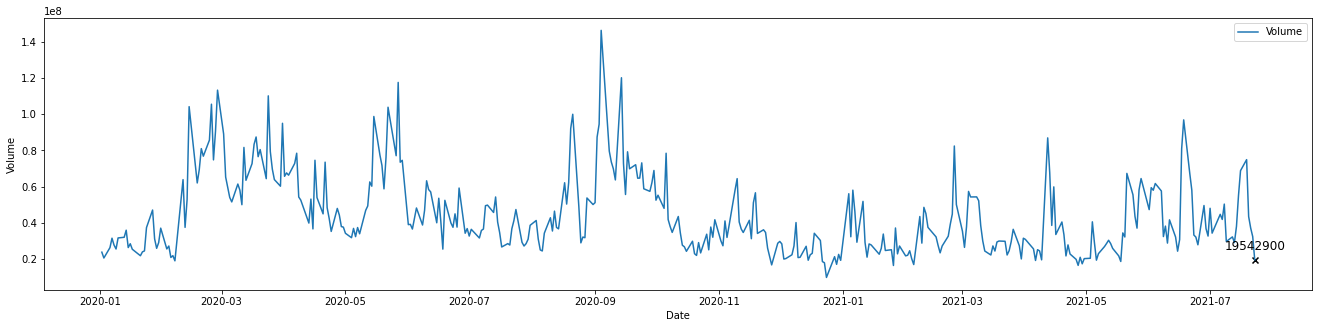


Menu:
Press 1: Simple Moving Average Visualizer
Press 2: Relative Strength Index
Press 3: Bollinger Bands
Press 4: MACD
Press 5: Fibonacci Retracement
Press 6: Average True Range: Volatility Indicator


 3
Time period (in days) 14


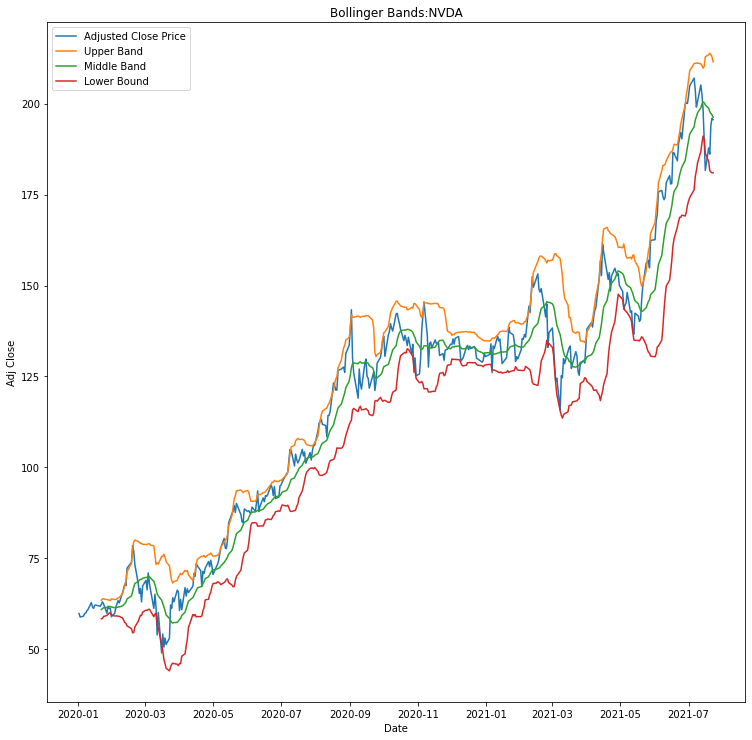

In [ ]:
import matplotlib.pyplot as plt
if __name__ == "__main__":
    
    welcome_input = int(input("Welcome! Type 1 to continue, 0 to exit"))
    
    while (welcome_input != 0):
        #Set status to 'buy' or 'sell' for signal prices
        tick_symbol = input("Ticker Symbol: ").upper()
        start_date = input("Start Date (YYYY-MM-DD): ")
        end_date = datetime.today().strftime('%Y-%m-%d')
        data = read_data(tick_symbol, start_date, end_date)
        show_initial_info(data, tick_symbol)
        print("\nMenu:")
        print("Press 1: Simple Moving Average Visualizer")
        print("Press 2: Relative Strength Index")
        print("Press 3: Bollinger Bands")
        print("Press 4: MACD")
        print("Press 5: Fibonacci Retracement")
        print("Press 6: Average True Range: Volatility Indicator")
        input_menu = int(input())

        if (input_menu == 1):

            status = input("Type 'buy' for Buy Indicator, 'sell' for sell indicators or any other characters for none")
            short_avg = int(input("What is your short moving average period?"))
            long_avg = int(input("What is your long moving average period?"))
            input_user = input("To view previous closing price, type 'y', else 'n'")
            #Set level to 'r' for resistance, 's' for support, 'b' for both 
            levels = input("Press 'r' for resistance levels, 's' for support levels, 'b' for both, else 'n' for nothing")

            #SMA
            generator(data, status, tick_symbol, short_avg, long_avg, levels, input_user) 
        elif (input_menu == 2):
            
            #To activate RSI generator type 'yes'
            #Change time period to your liking 
            time_period = int(input("Time period (in days)"))
            RSI(data, tick_symbol, time_period)

        elif (input_menu == 3):
        
            period_bollinger = int(input("Time period (in days)"))
            Bollinger_Band(data, period_bollinger, tick_symbol)

        elif (input_menu == 4):
           
            short_term = int(input("What is your short term period? (in days)"))
            mid_term = int(input("What is your mid term period? (in days)"))
            long_term = int(input("What is your long term period? (in days)"))
            MACD(data, tick_symbol, short_term, mid_term, long_term)
        elif (input_menu == 5):
            fibonacci_retracement(data, tick_symbol)
        elif (input_menu == 6):
            period_atr = int(input('Time period (in days)'))
            ATR(data, tick_symbol, period_atr)
        welcome_input = int(input("Would you like to continue? Type 1 for 'Yes', 0 for 'no'"))
                 
